# Import modules

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [101]:
df = pd.read_excel('Loan.xlsx')

In [102]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


* **Loan_ID** - Id кредита
* **Gender** - Пол (Male/Female)
* **Married** - Семейное положение (Yes, No)
* **Dependents** - иждивенцы (0, 1, 2, 3+)
* **Education** - образование (Graduate, Not Graduate)
* **Self_Employed** - Предприниматель (Yes, No)
* **Applicantincome** - доход 
* **CoapplicantIncome** - доход созаявителя
* **LoanAmount** - величина займа
* **Loan_Amount_Term** - срок займа
* **Credit_History** - кредитная история
* **Property_Area** - местность (Urban, Rural)
* **Loan_Status** - статус кредита(Y,N)


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [104]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Preprocessing the dataset

In [105]:
# find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [106]:
#fill the missing for categorical term - mode ('Gender', 'Married', 'Dependents', 'Self_Employed')
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].replace('3+', 3).fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [107]:
#fill the missing for numerical term - mean ('LoanAmount', 'Loan_Amount_Term') 
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [108]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

number of people who take loan as group by gender
Male      502
Female    112
Name: Gender, dtype: int64


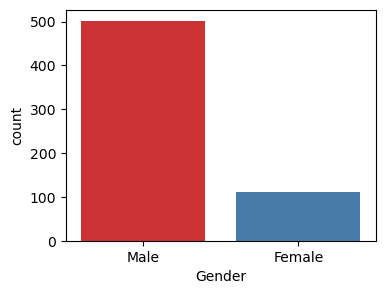

In [109]:
print('number of people who take loan as group by gender')
print(df['Gender'].value_counts())
plt.figure(figsize=(4, 3))
sns.countplot(data = df, x = 'Gender', palette = 'Set1')
plt.show()

number of people who take loan as group by marital status
Yes    401
No     213
Name: Married, dtype: int64


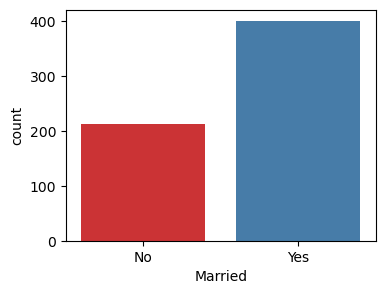

In [110]:
print('number of people who take loan as group by marital status')
print(df['Married'].value_counts())
plt.figure(figsize=(4, 3))
sns.countplot(data = df, x = 'Married', palette = 'Set1')
plt.show()

number of people who take loan as group by dependents
0.0    360
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64


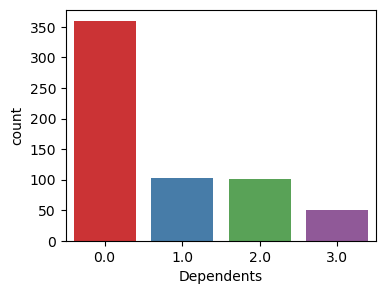

In [111]:
print('number of people who take loan as group by dependents')
print(df['Dependents'].value_counts())
plt.figure(figsize=(4, 3))
sns.countplot(data = df, x = 'Dependents', palette = 'Set1')
plt.show()

number of people who take loan as group by self employed
No     532
Yes     82
Name: Self_Employed, dtype: int64


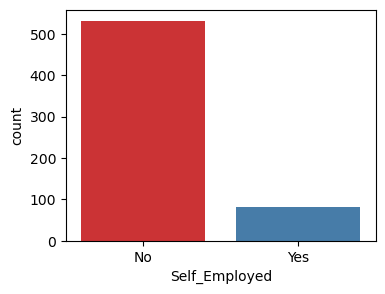

In [112]:
print('number of people who take loan as group by self employed')
print(df["Self_Employed"].value_counts())
plt.figure(figsize=(4, 3))
sns.countplot(data = df, x = "Self_Employed", palette = 'Set1')
plt.show()

number of people who take loan as group by education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


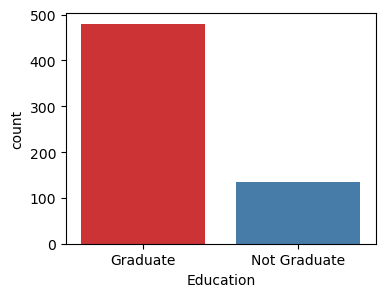

In [113]:
print('number of people who take loan as group by education')
print(df['Education'].value_counts())
plt.figure(figsize=(4, 3))
sns.countplot(data = df, x = 'Education', palette = 'Set1')
plt.show()

number of people who take loan as group by property area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


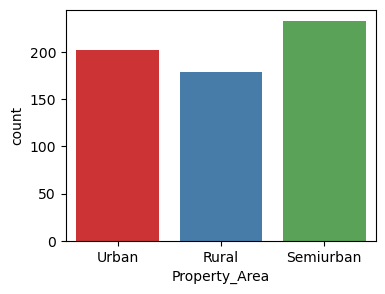

In [114]:
print('number of people who take loan as group by property area')
print(df['Property_Area'].value_counts())
plt.figure(figsize=(4, 3))
sns.countplot(data = df, x = 'Property_Area', palette = 'Set1')
plt.show()

number of people who take loan as group by credit history
1.0    525
0.0     89
Name: Credit_History, dtype: int64


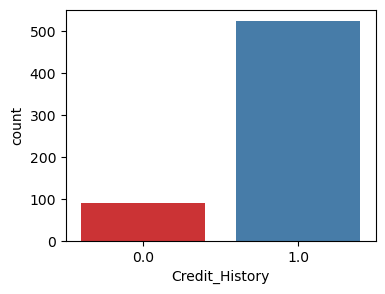

In [115]:
print('number of people who take loan as group by credit history')
print(df['Credit_History'].value_counts())
plt.figure(figsize=(4, 3))
sns.countplot(data = df, x = 'Credit_History', palette = 'Set1')
plt.show()

number of people who take loan as group by loan status
Y    422
N    192
Name: Loan_Status, dtype: int64


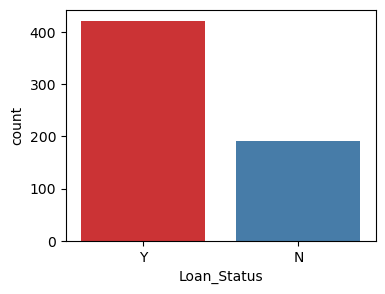

In [116]:
print('number of people who take loan as group by loan status')
print(df['Loan_Status'].value_counts())
plt.figure(figsize=(4, 3))
sns.countplot(data = df, x = 'Loan_Status', palette = 'Set1')
plt.show()

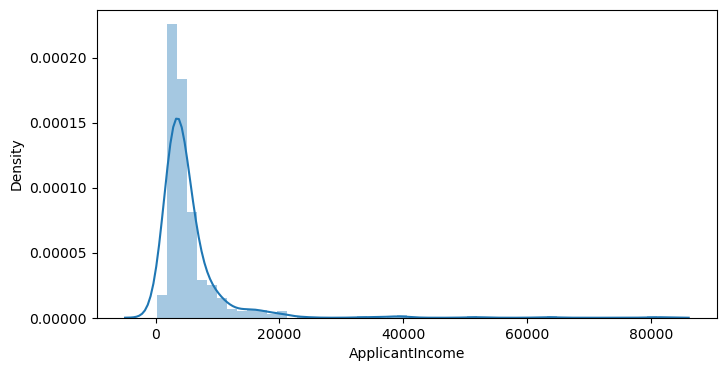

In [117]:
plt.figure(figsize=(8, 4))
sns.distplot(df['ApplicantIncome'])
plt.show()

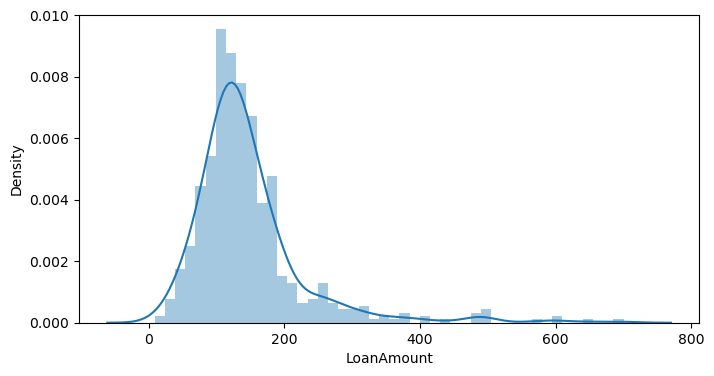

In [118]:
plt.figure(figsize=(8, 4))
sns.distplot(df['LoanAmount'])
plt.show()

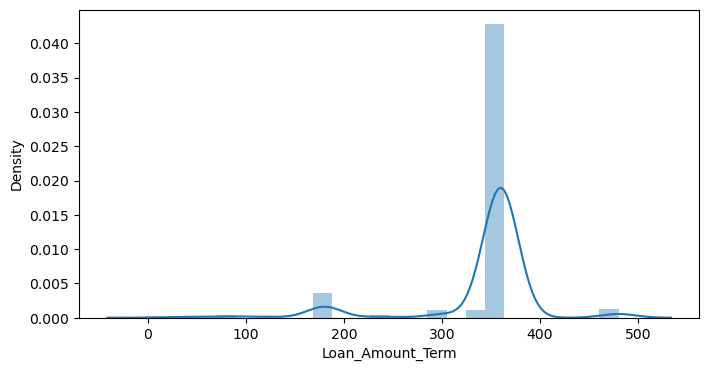

In [119]:
plt.figure(figsize=(8, 4))
sns.distplot(df['Loan_Amount_Term'])
plt.show()

# Creation of new attributes

In [120]:
#Create a TotalIncome column
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


### Log transformation

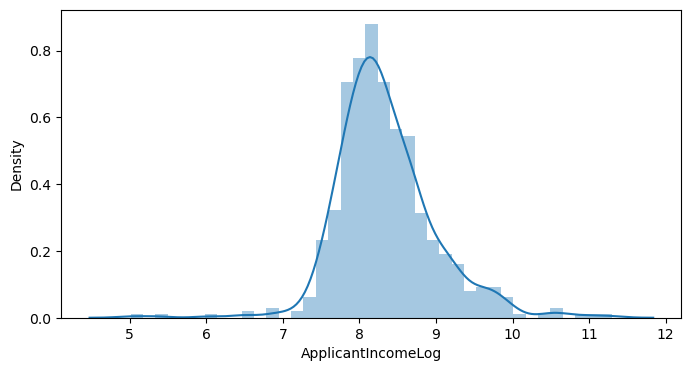

In [121]:
#apply Log transformation to the attribute
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
plt.figure(figsize=(8, 4))
sns.distplot(df['ApplicantIncomeLog'])
plt.show()

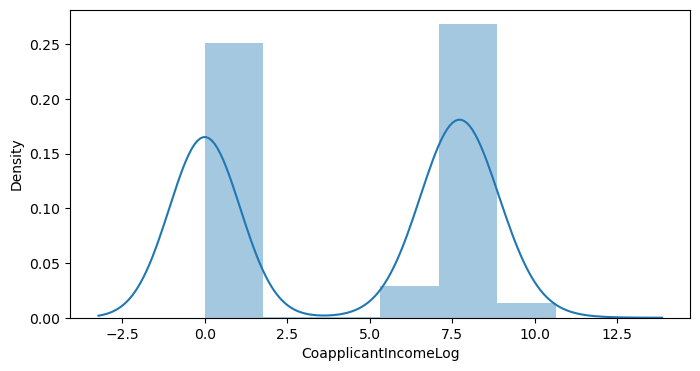

In [122]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
plt.figure(figsize=(8, 4))
sns.distplot(df['CoapplicantIncomeLog'])
plt.show()

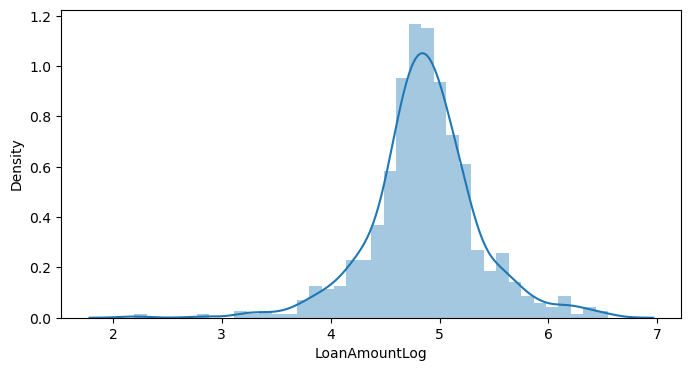

In [123]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
plt.figure(figsize=(8, 4))
sns.distplot(df['LoanAmountLog'])
plt.show()

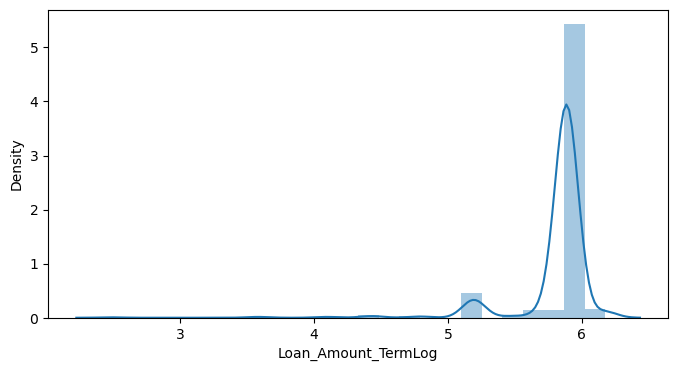

In [124]:
df['Loan_Amount_TermLog'] = np.log(df['Loan_Amount_Term'])
plt.figure(figsize=(8, 4))
sns.distplot(df['Loan_Amount_TermLog'])
plt.show()

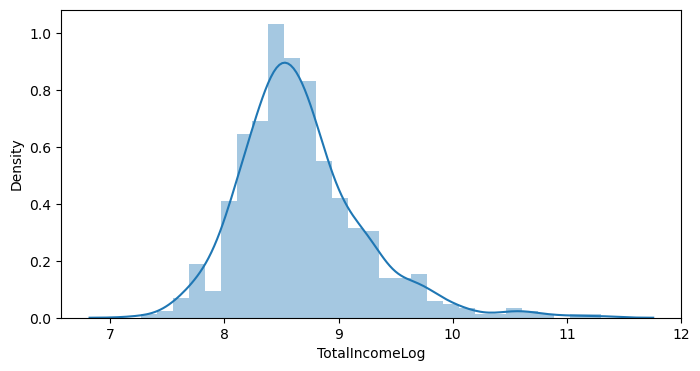

In [125]:
df['TotalIncomeLog'] = np.log(df['TotalIncome'])
plt.figure(figsize=(8, 4))
sns.distplot(df['TotalIncomeLog'])
plt.show()

### Coorelation Matrix

<Axes: >

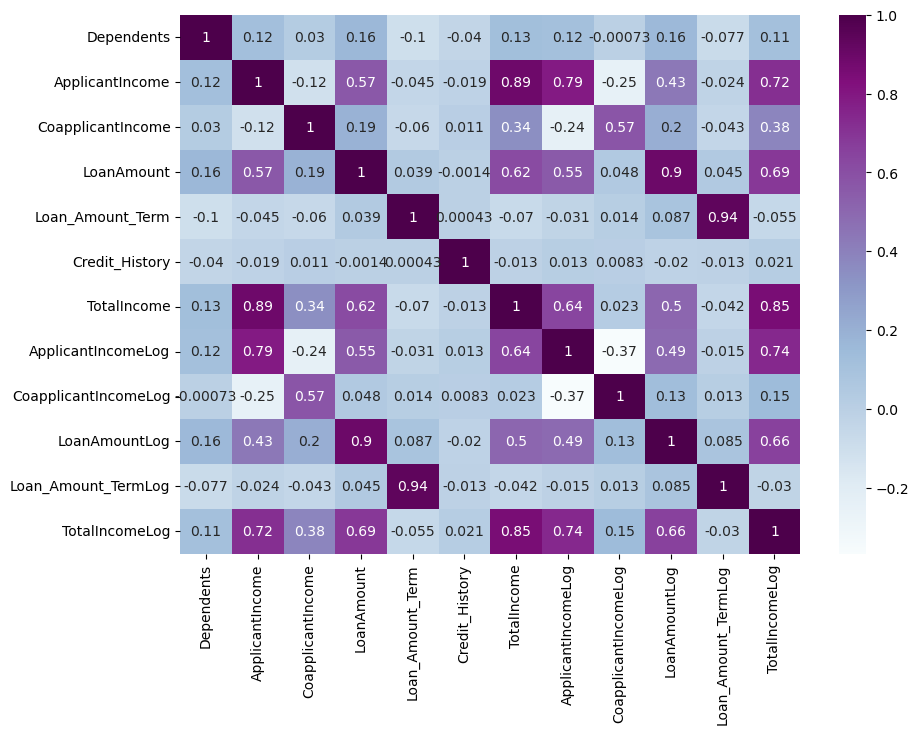

In [126]:
corr = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot = True, cmap = 'BuPu')

In [127]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,TotalIncomeLog
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,0.000000,4.986426,5.886104,8.674026
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,7.319202,4.852030,5.886104,8.714568
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,0.000000,4.189655,5.886104,8.006368
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,7.765993,4.787492,5.886104,8.505323
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,0.000000,4.948760,5.886104,8.699515


In [128]:
#drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'TotalIncome', 'Loan_ID', 'CoapplicantIncomeLog']
df_new = df.drop(columns=cols, axis=1)
df_new.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,TotalIncomeLog
0,Male,No,0.0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1.0,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0.0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0.0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0.0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


### Label Encoding

In [129]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Dependents']
for col in cols:
    df_new[col] = LabelEncoder().fit_transform(df_new[col])

In [130]:
df_new.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,TotalIncomeLog
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515


### Train-Test split

In [131]:
X = df_new.drop(['Loan_Status'], axis=1)
y = df_new['Loan_Status']

In [132]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Model training

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

models = {
    'LogisticRegression' : LogisticRegression(random_state = 42),
    'DecisionTreeClassifier' : DecisionTreeClassifier(max_depth=1, random_state = 42),
    'RandomForestClassifier' : RandomForestClassifier(random_state = 42, min_samples_split = 25, max_depth = 7, max_features = 1),
    'CatBoostClassifier' : CatBoostClassifier(random_state = 42, verbose = 0)
}

In [134]:
#import metrics, create loss() function - for compact visualisation metrics

from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score, roc_auc_score

def loss(ytrue, ypred, retu=False):
    precision = precision_score(ytrue, ypred)
    recall = recall_score(ytrue, ypred)
    f1 =  f1_score(ytrue, ypred)
    loss = log_loss(ytrue, ypred)
    accuracy = accuracy_score(ytrue, ypred)
    roc = roc_auc_score(ytrue, ypred) 

    
    
    if retu:
        return precision, recall, f1, loss, accuracy
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f\n  roc: %.3f' % (precision, recall, f1, loss, accuracy, roc))

In [135]:
### create train_eval_train() fuction - for fast training model
def train_eval_train(models, Xtrain, ytrain, Xtest, ytest, X, y):
    for name, model in models.items():
        print(f'{name}:')
        model.fit(Xtrain, ytrain)
        loss(ytest, model.predict(Xtest))
        print('  Cross_val:', np.mean(cross_val_score(model, X, y, cv=5)).round(3))
        
        print('-' * 30)
        
train_eval_train(models, Xtrain, ytrain, Xtest, ytest, X, y)

LogisticRegression:
  pre: 0.748
  rec: 0.980
  f1: 0.848
  loss: 8.192
  acc: 0.773
  roc: 0.684
  Cross_val: 0.809
------------------------------
DecisionTreeClassifier:
  pre: 0.748
  rec: 0.980
  f1: 0.848
  loss: 8.192
  acc: 0.773
  roc: 0.684
  Cross_val: 0.809
------------------------------
RandomForestClassifier:


  pre: 0.737
  rec: 0.980
  f1: 0.841
  loss: 8.660
  acc: 0.760
  roc: 0.666
  Cross_val: 0.806
------------------------------
CatBoostClassifier:
  pre: 0.764
  rec: 0.970
  f1: 0.855
  loss: 7.724
  acc: 0.786
  roc: 0.707
  Cross_val: 0.803
------------------------------


### Hyperparameter tuning

In [136]:
from sklearn.model_selection import GridSearchCV
param_grid = {'min_samples_split' : [5, 10, 20, 25], 
              'max_features' : [1, 2, 5, 10], 
              'max_depth': [1, 2, 5, 7]}

gs_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring='roc_auc', n_jobs=-1, cv=5 )
gs_forest.fit(Xtrain, ytrain)

print(f'Лучшая модель: {gs_forest.best_estimator_}')
print(f'Лучшие параметры: {gs_forest.best_params_}')



Лучшая модель: RandomForestClassifier(max_depth=7, max_features=5, min_samples_split=5)
Лучшие параметры: {'max_depth': 7, 'max_features': 5, 'min_samples_split': 5}


In [137]:
ypred_forest = gs_forest.best_estimator_.predict(Xtest)
loss(ytest, ypred_forest)

  pre: 0.754
  rec: 0.980
  f1: 0.852
  loss: 7.958
  acc: 0.779
  roc: 0.694


In [138]:
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty' : ['l1', 'l2', 'elasticnet']}

gs_log = GridSearchCV(LogisticRegression(), param_grid, scoring='roc_auc', n_jobs=-1, cv=5 )
gs_log.fit(Xtrain, ytrain)

print(f'Лучшая модель: {gs_log.best_estimator_}')
print(f'Лучшие параметры: {gs_log.best_params_}')

Лучшая модель: LogisticRegression(C=0.1)
Лучшие параметры: {'C': 0.1, 'penalty': 'l2'}


In [139]:
ypred_log = gs_log.best_estimator_.predict(Xtest)
loss(ytest, ypred_log)

  pre: 0.748
  rec: 0.980
  f1: 0.848
  loss: 8.192
  acc: 0.773
  roc: 0.684


In [140]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors' : range(1, 50) }

gs_knn = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='roc_auc', n_jobs=-1, cv=5 )
gs_knn.fit(Xtrain, ytrain)

print(f'Лучшая модель: {gs_knn.best_estimator_}')
print(f'Лучшие параметры: {gs_knn.best_params_}')

Лучшая модель: KNeighborsClassifier(n_neighbors=8)
Лучшие параметры: {'n_neighbors': 8}


In [141]:
ypred_knn = gs_knn.best_estimator_.predict(Xtest)
loss(ytest, ypred_knn)

  pre: 0.721
  rec: 0.930
  f1: 0.812
  loss: 10.064
  acc: 0.721
  roc: 0.632


In [142]:
from xgboost import XGBClassifier

param = {'max_depth':range(2, 20, 1),
         'n_estimators' : range(1,25) 
         }

gs_xgb = GridSearchCV(XGBClassifier(), param, scoring='roc_auc', n_jobs=-1, cv=5 )
gs_xgb.fit(Xtrain, ytrain)

print(f'Лучшая модель: {gs_xgb.best_estimator_}')
print(f'Лучшие параметры: {gs_xgb.best_params_}')

Лучшая модель: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=8, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Лучшие параметры: {'max_depth': 5, 'n_estimators': 8}


In [143]:
ypred_xgb = gs_xgb.best_estimator_.predict(Xtest)
loss(ytest, ypred_xgb)

  pre: 0.777
  rec: 0.940
  f1: 0.851
  loss: 7.724
  acc: 0.786
  roc: 0.720


In [144]:
from catboost import CatBoostClassifier

param = {'num_leaves':range(10, 100),
         'n_estimators' : range(1,100, 2) 
         }

gs_cat = GridSearchCV(CatBoostClassifier(), param, scoring='roc_auc', n_jobs=-1, cv=5 )
gs_cat.fit(Xtrain, ytrain)

print(f'Лучшая модель: {gs_cat.best_estimator_}')
print(f'Лучшие параметры: {gs_cat.best_params_}')

Learning rate set to 0.070901
0:	learn: 0.6710422	total: 3.02ms	remaining: 254ms
1:	learn: 0.6543320	total: 5.82ms	remaining: 241ms
2:	learn: 0.6353375	total: 8.4ms	remaining: 230ms
3:	learn: 0.6168484	total: 10.9ms	remaining: 220ms
4:	learn: 0.6022032	total: 13.1ms	remaining: 210ms
5:	learn: 0.5855658	total: 14ms	remaining: 184ms
6:	learn: 0.5724105	total: 16.2ms	remaining: 181ms
7:	learn: 0.5626197	total: 18.5ms	remaining: 178ms
8:	learn: 0.5527322	total: 21ms	remaining: 177ms
9:	learn: 0.5436112	total: 23.8ms	remaining: 179ms
10:	learn: 0.5347976	total: 26.8ms	remaining: 181ms
11:	learn: 0.5273284	total: 29.2ms	remaining: 177ms
12:	learn: 0.5205955	total: 31.6ms	remaining: 175ms
13:	learn: 0.5134976	total: 34.3ms	remaining: 174ms
14:	learn: 0.5064855	total: 35.4ms	remaining: 165ms
15:	learn: 0.5006121	total: 37.7ms	remaining: 163ms
16:	learn: 0.4946099	total: 39.5ms	remaining: 158ms
17:	learn: 0.4908283	total: 41.9ms	remaining: 156ms
18:	learn: 0.4858049	total: 44.2ms	remaining: 153

In [145]:
ypred_cat = gs_cat.best_estimator_.predict(Xtest)
loss(ytest, ypred_cat)

  pre: 0.748
  rec: 0.980
  f1: 0.848
  loss: 8.192
  acc: 0.773
  roc: 0.684


### Confusion matrix

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

<Axes: >

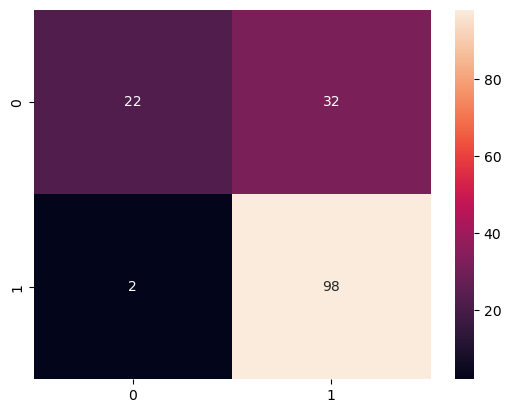

In [146]:
from sklearn.metrics import confusion_matrix
cm = sns.heatmap(confusion_matrix(ytest, ypred_forest), annot=True)
cm

# Conсlusion

The best quality is obtained with a RandomForestClassifier. 

In [147]:
loss(ytest, ypred_forest)

  pre: 0.754
  rec: 0.980
  f1: 0.852
  loss: 7.958
  acc: 0.779
  roc: 0.694


Our recall score will not improving , maybe because we don't have a good amount of data, so I think if we got more data and we try more complex models our accuracy will improve.